<a href="https://colab.research.google.com/github/ricky4918/Tensorflow-2.0-Deep-Learning-and-Artificial-Intelligence/blob/main/Recurrent%20Neural%20Network_Time%20Series_and_Sequence%20Data/Autoregressive_Linear_Model_For_Time_Series_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shape of a Sequence

* N = # samples
* D = # features
* T = # time steps in the sequence

In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.optimizers import SGD,Adam
import pandas as pd
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.models import Model

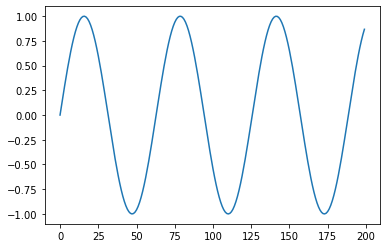

In [3]:
series = np.sin(0.1*np.arange(200))
plt.plot(series)
plt.show()

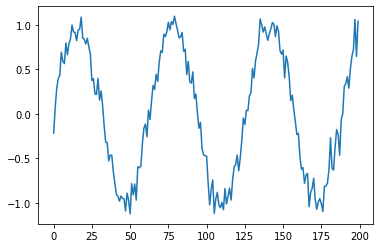

In [31]:
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1
plt.plot(series)
plt.show()

In [ ]:
print(series)

In [33]:
T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)


In [34]:
X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10) Y.shape (190,)


In [35]:
i = Input(shape = (T, ))
x = Dense(1)(i)
model = Model(i,x)
model.compile(
    loss = 'mse',
    optimizer = Adam(lr = 0.1),
)

r = model.fit(X[:-N//2], Y[:-N//2],
              epochs=80,
              validation_data = (X[-N//2:], Y[-N//2:]))

Epoch 1/80


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 0s 62ms/step - loss: 0.2810 - val_loss: 0.3135
Epoch 2/80
3/3 [==============================] - 0s 24ms/step - loss: 0.1740 - val_loss: 0.0731
Epoch 3/80
3/3 [==============================] - 0s 23ms/step - loss: 0.1344 - val_loss: 0.1039
Epoch 4/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0642 - val_loss: 0.0739
Epoch 5/80
3/3 [==============================] - 0s 26ms/step - loss: 0.0727 - val_loss: 0.0696
Epoch 6/80
3/3 [==============================] - 0s 24ms/step - loss: 0.0372 - val_loss: 0.0625
Epoch 7/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0535 - val_loss: 0.0724
Epoch 8/80
3/3 [==============================] - 0s 25ms/step - loss: 0.0374 - val_loss: 0.0490
Epoch 9/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0393 - val_loss: 0.0458
Epoch 10/80
3/3 [==============================] - 0s 18ms/step - loss: 0.0293 - val_loss: 0.0465
Epoch 11/80
3/3 [=======================

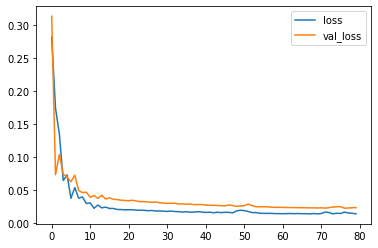

In [36]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [26]:
X[1].reshape(1,-1)

array([[0.09983342, 0.19866933, 0.29552021, 0.38941834, 0.47942554,
        0.56464247, 0.64421769, 0.71735609, 0.78332691, 0.84147098]])

In [37]:
validation_target = Y[-N//2:]
validation_predictions = []


i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1,-1))[0,0]
  i += 1

  validation_predictions.append(p)



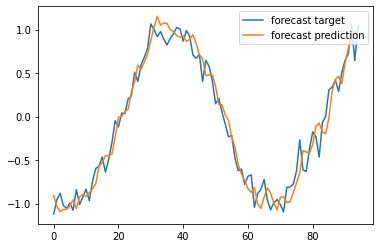

In [38]:
plt.plot(validation_target, label = "forecast target")
plt.plot(validation_predictions, label = 'forecast prediction')
plt.legend()

In [39]:
validation_target = Y[-N//2:]
validation_predictions = []


last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1,-1))[0,0]

  validation_predictions.append(p)

  last_x = np.roll(last_x, -1)
  last_x[-1] = p

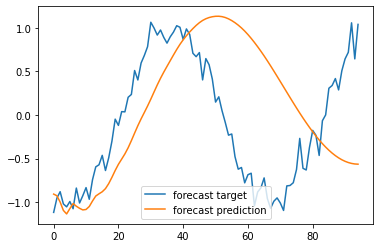

In [40]:
plt.plot(validation_target, label = "forecast target")
plt.plot(validation_predictions, label = 'forecast prediction')
plt.legend()